# Correcting GHZ probabilities on Melbourne

Shows how to correct for really bad readout errors and transforming to true probability distribution.

In [1]:
import numpy as np
from qiskit import *

In [2]:
import mthree
mthree.about()

# Matrix-free Measurement Mitigation (M3) version 0.4.1.dev1+1fabf99
# (C) Copyright IBM Quantum, 2021
# Paul Nation, Hwajung Kang, and Jay Gambetta


In [3]:
IBMQ.load_account()
provider = IBMQ.get_provider(group='deployed')
backend = provider.backend.ibmq_16_melbourne

In [4]:
qc = QuantumCircuit(5)
qc.h(2)
qc.cx(2,1)
qc.cx(1,0)
qc.cx(2,3)
qc.cx(3,4)
qc.measure_all()

In [5]:
trans_qc = transpile(qc, backend)

In [6]:
raw_counts = backend.run(trans_qc, shots=2048).result().get_counts()

In [7]:
mit = mthree.M3Mitigation(backend)
mit.tensored_cals_from_system(range(qc.num_qubits))

In [8]:
quasi, details = mit.apply_correction(raw_counts, range(qc.num_qubits), details=True)
details

{'method': 'direct',
 'time': 0.002025127410888672,
 'dimension': 32,
 'col_norms': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [9]:
from qiskit.visualization import plot_histogram

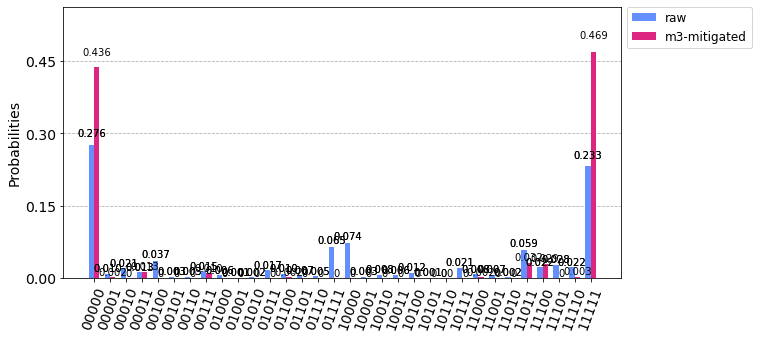

In [10]:
plot_histogram([raw_counts, quasi.nearest_probability_distribution()], figsize=(10,5),
              legend=['raw', 'm3-mitigated'])